<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Telecommunication-Churning-1/blob/main/Telecom_Churn_Analysis_(Team_DSB)_Capstone_Project_1draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

***Project Objective***

---



In this project, we will analyse customer data of a leading telecom company to identify the main indicators of churn and try to provide recommendations for better customer retention.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/Classroom/Team DSB/Telecom Churn.csv'
df = pd.read_csv(path)

# New section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From the above analysis we can infer that there are 3333 entries and 20 columns

Further we can see that there are no null values .

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Columns analysis**

---



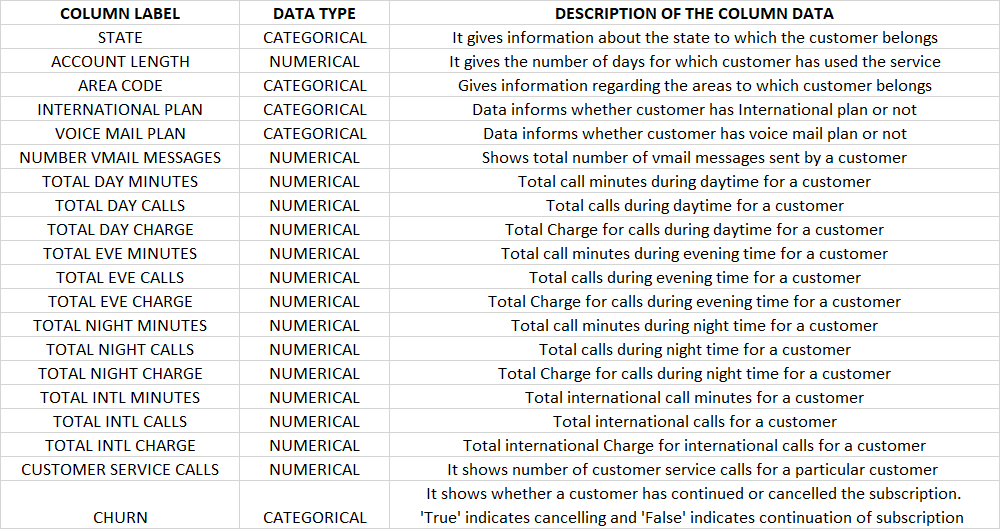

In [ ]:
df["Churn"].mean()

0.14491449144914492

14.49 % of churn is pretty bad new for Orange telecom





In [ ]:
df.corr()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [ ]:
df.isnull().values.sum()

0

There is no missing data in our dataset

Churn = False means the customer is still using the service

Churn = True means that the customer discontinued the service

**Performing Univariate Analysis**

---



The purpose is to analyse some individual fields to understand how they are affecting the churn of customers.

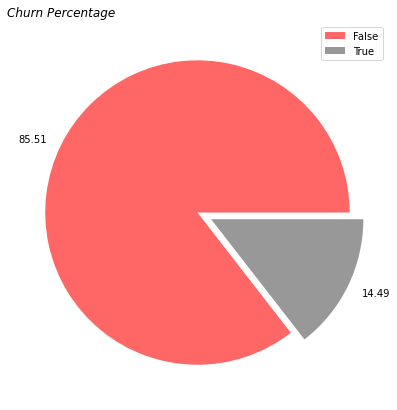

In [ ]:
df_count = (df.Churn.value_counts())
total = sum(df_count)
data_percentage = (df_count)/total*100
plt.figure(figsize=(7,7))
plt.pie(data_percentage,explode=(0,0.1), labels = [round(i,2) for i in (list(data_percentage))],colors=['#ff6666','#989898'])
plt.title(label ='Churn Percentage',fontstyle='italic',loc= 'left')
plt.legend(labels=['False','True'])
plt.show()

From the above pie chart we can infer that ( 483 ) 14.49% of customers have left the company

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Account Length Distribution')]

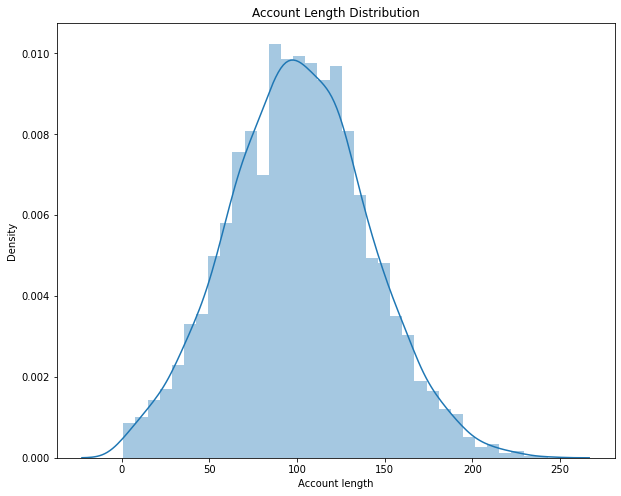

In [ ]:
account_length = df['Account length']
plt.rcParams['figure.figsize'] = (10,8)
sns.distplot(account_length, hist=True).set(title='Account Length Distribution')


In [ ]:
account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account length, dtype: float64

It can be seen that customers have a mean of 101.06 days of account length

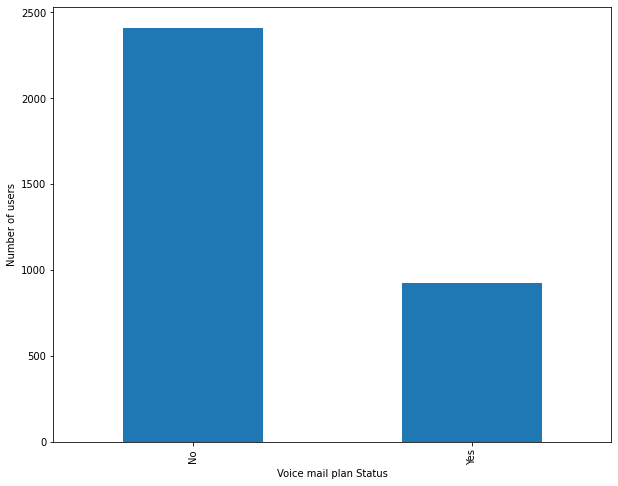

In [ ]:
# VOICE MAIL PLAN ANALYSIS:
voice_plan = df['Voice mail plan'].value_counts()
voice_plan.plot(kind = 'bar')
plt.xlabel('Voice mail plan Status')
plt.ylabel('Number of users')
plt.rcParams['figure.figsize'] = (10,5)

We can see that majority of the customers donot have voice mail plan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


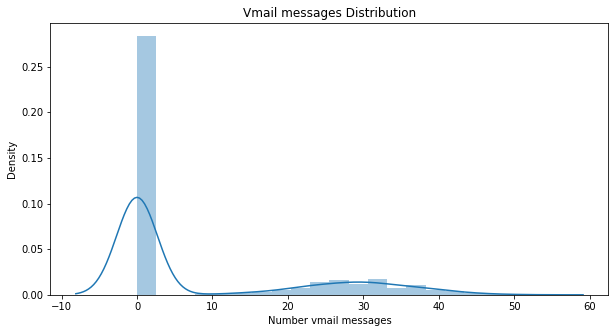

In [ ]:
# NUMBER OF VMAIL MESSAGES ANALYSIS:
num_vmail = df['Number vmail messages']
sns.distplot(num_vmail).set(title='Vmail messages Distribution')
plt.rcParams['figure.figsize'] = (10,5)


We can see that most customers do not have Vamil plan ,hence the density is highest at 0.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution')]

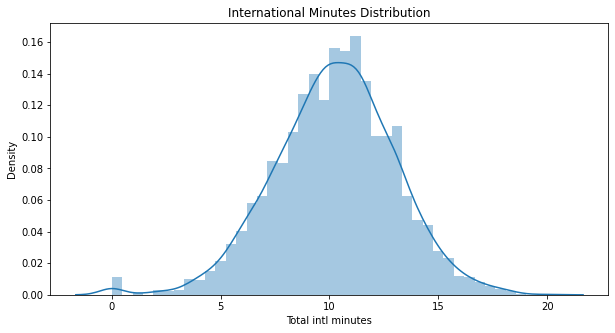

In [ ]:
#  TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes = df['Total intl minutes']
sns.distplot(int_minutes, hist=True).set(title='International Minutes Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution Among People With International Plan')]

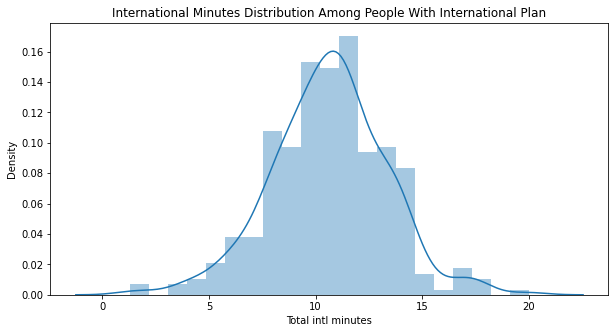

In [ ]:
# TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes_with_plan = df.loc[df['International plan']=='Yes','Total intl minutes']
sns.distplot(int_minutes_with_plan, hist=True).set(title='International Minutes Distribution Among People With International Plan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution Among People Without International Plan')]

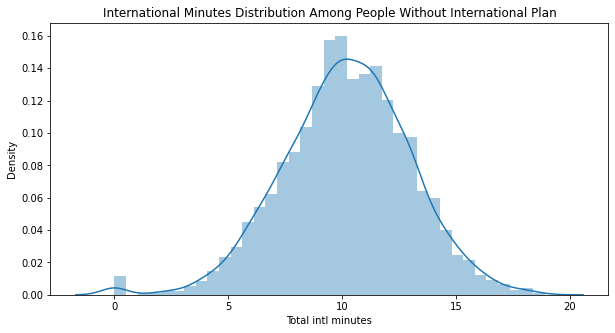

In [ ]:
# TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes_without_plan = df.loc[df['International plan']=='No','Total intl minutes']
sns.distplot(int_minutes_without_plan, hist=True).set(title='International Minutes Distribution Among People Without International Plan')

In [ ]:
int_minutes_without_plan.describe()

count    3010.000000
mean       10.195349
std         2.798937
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: Total intl minutes, dtype: float64

In [ ]:
int_minutes_with_plan.describe()

count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: Total intl minutes, dtype: float64

In [ ]:
int_charge_with_plan = df.loc[df['International plan']=='Yes','Total intl charge']
int_charge_with_plan.describe()

count    323.000000
mean       2.869907
std        0.728151
min        0.350000
25%        2.430000
50%        2.920000
75%        3.290000
max        5.400000
Name: Total intl charge, dtype: float64

In [ ]:
int_charge_without_plan = df.loc[df['International plan']=='No','Total intl charge']
int_charge_without_plan.describe()


count    3010.000000
mean        2.753279
std         0.755716
min         0.000000
25%         2.270000
50%         2.750000
75%         3.270000
max         5.100000
Name: Total intl charge, dtype: float64

In [ ]:

df['Intl Call rate']=df['Total intl minutes']/df['Total intl charge']

In [ ]:
Cust_no_intl_plan=df.loc[df['International plan']=='No','Intl Call rate']
Cust_no_intl_plan.describe()

count    2992.000000
mean        3.702907
std         0.004549
min         3.666667
25%         3.699634
50%         3.703704
75%         3.706294
max         3.728814
Name: Intl Call rate, dtype: float64

In [ ]:
Cust_with_intl_plan=df.loc[df['International plan']=='Yes','Intl Call rate']
Cust_with_intl_plan.describe()

count    323.000000
mean       3.703183
std        0.004109
min        3.684211
25%        3.700153
50%        3.703704
75%        3.706429
max        3.714286
Name: Intl Call rate, dtype: float64

**We can see something very interesting with this analysis.Customers with international plans are charged at almost the same rate as customers with no international plan.**

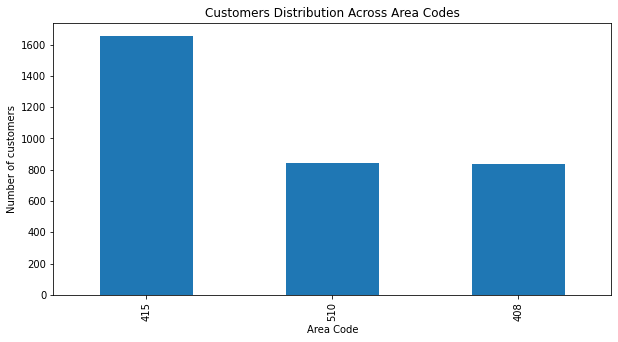

In [ ]:
# AREA CODE ANALYSIS
area_code=df['Area code'].value_counts()
area_code.plot(kind='bar')
plt.title('Customers Distribution Across Area Codes')
plt.ylabel('Number of customers')
plt.xlabel('Area Code')
plt.rcParams['figure.figsize'] = (10,5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Customer Service Calls Distribution')]

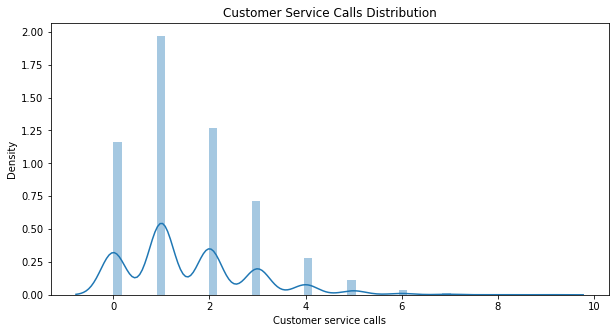

In [ ]:
# CUSTOMER SERVICE CALLS ANALYSIS
custo_calls = df['Customer service calls']
sns.distplot(custo_calls, hist=True).set(title='Customer Service Calls Distribution')

We can see that most people made 1  or 2 customer calls.

#                                     HEATMAP FOR THE DATASET

---






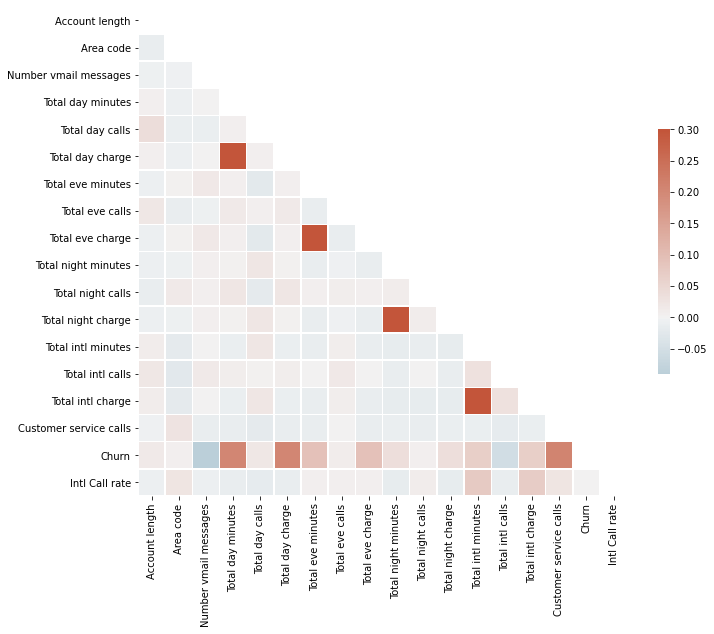

In [ ]:
# Getting A Heatmap Co-Relating Various Columns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Performing Bi-Variate Analysis With 'Churn' As Pivot Column**

---



---


In [ ]:
#Preparing necessary data for visualisation
slist=df['State'].values
#To distinguish between Churn True and False 
df_true = pd.DataFrame(df[df['Churn']==True].groupby(['State']).count().iloc[:]['Churn']).reset_index()
df_false = pd.DataFrame(df[df['Churn']==False].groupby(['State']).count().iloc[:]['Churn']).reset_index()
#Merging both the dataframes
df_tf = pd.merge(df_true,df_false,on='State')
df_tf.columns=['State','Churn True','Churn False']
df_tf['Total']= df_tf['Churn False']+df_tf['Churn True']

,State,Churn True,Churn False
0,AK,3,49
1,AL,8,72
2,AR,11,44
3,AZ,4,60
4,CA,9,25
5,CO,9,57
6,CT,12,62
7,DC,5,49
8,DE,9,52
9,FL,8,55


Statewise Churn Distribution

[]

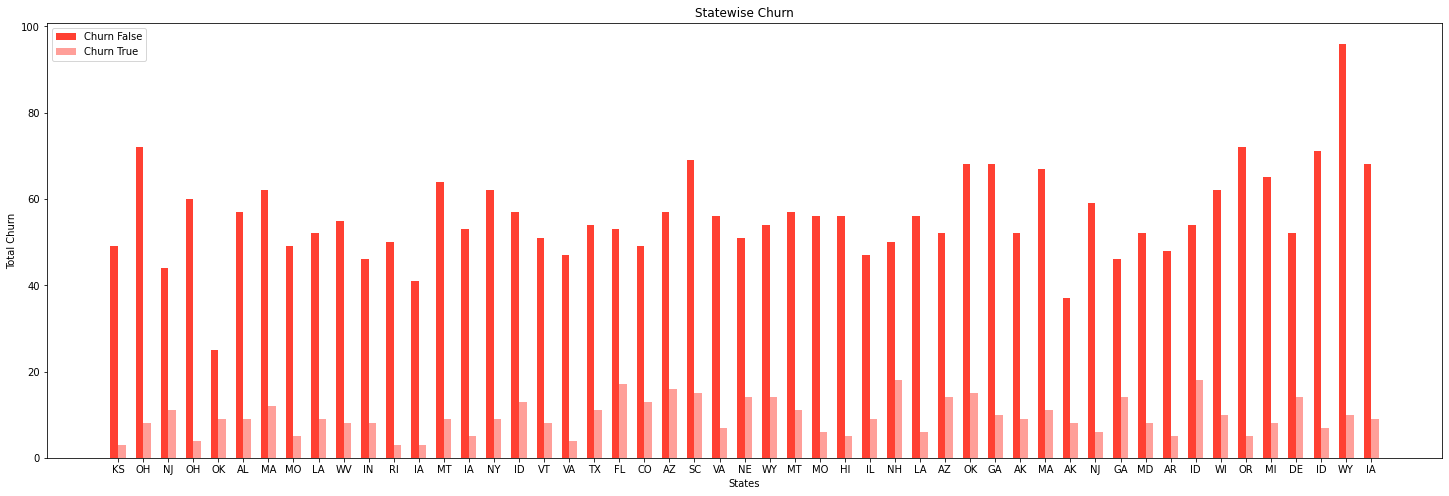

In [ ]:
# Plot 1

no_of_states=df_tf['State'].count()

labels = slist[:no_of_states]
cf = list(df_tf['Churn False'][:no_of_states])
ct = list(df_tf['Churn True'][:no_of_states])

x= np.arange(len(labels))
width = 0.30

fig, ax=plt.subplots(figsize=(25,8))

r1=ax.bar(x-width/2,cf,width,label='Churn False',color='#FF4032')
r2=ax.bar(x+width/2,ct,width,label='Churn True',color='#FF9F99')
ax.set_ylabel('Total Churn')
ax.set_xlabel('States')
ax.set_title('Statewise Churn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot()

1) Over all from the above graph the customers are not prone to churning

2) WY,OH,MT & OR are the states which have good retention rate

3) Fl,NH & ID are the states which have bad retention rate

4) People from state 'WY' are enjoying the telecom service most among all     other states

5) NH is the state which has low retention rate

In [ ]:
#Lets analyse churn based on various plans for the customers
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [ ]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,No,Yes
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


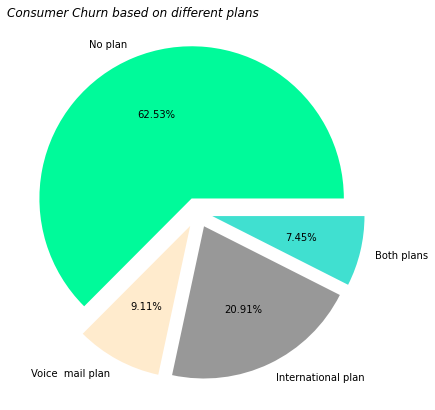

In [ ]:
#Finding out number of customers who left company from different plans

df_int_plan = pd.DataFrame(df[df['Churn']==True].groupby(['International plan','Voice mail plan']).count())['Churn'].reset_index()

#Plot a pie chart 
plt.figure(figsize=(7,7))
plt.pie(df_int_plan['Churn'],explode=(0.1,0.1,0.1,0.1),labels=['No plan','Voice  mail plan','International plan','Both plans'],colors=['#00FA9A','#FFEBCD','#989898','#40E0D0'],autopct="%1.2f%%")

plt.title(label ="Consumer Churn based on different plans",fontstyle='italic',loc= 'left')
plt.show()


From this Plot , we can infer that customers with no plan churn the most. International plan subscribers tend to churn more compared to the voice mail plan customers

In [ ]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


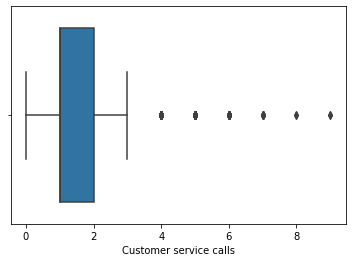

In [ ]:
sns.boxplot(df['Customer service calls'])

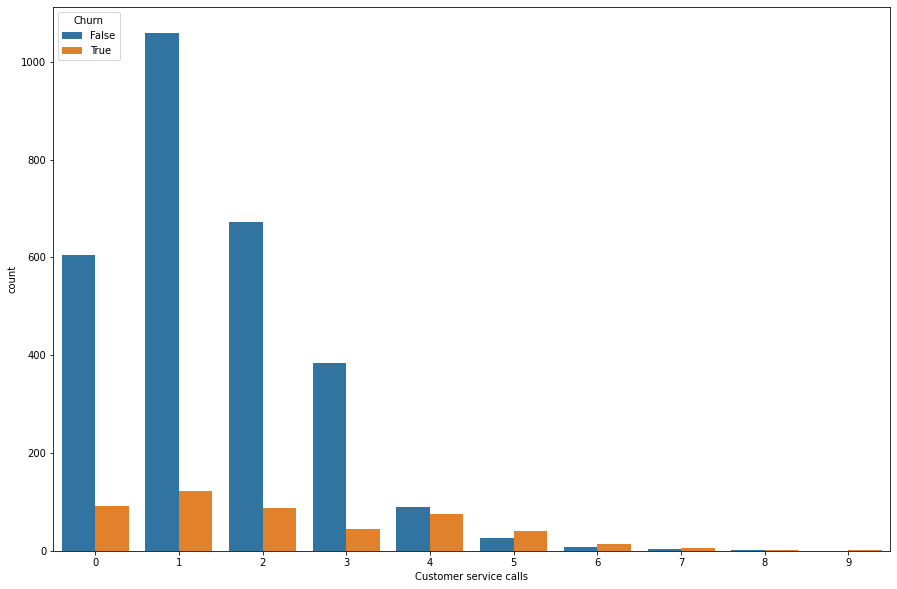

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
ax = sns.countplot(x ='Customer service calls', hue = 'Churn', data = df);

In [ ]:
df_cc = pd.DataFrame(df[df['Churn']].groupby(['Customer service calls']).count().iloc[:]['Churn']).reset_index()
df_cs = pd.DataFrame(df['Customer service calls'].value_counts()).reset_index()

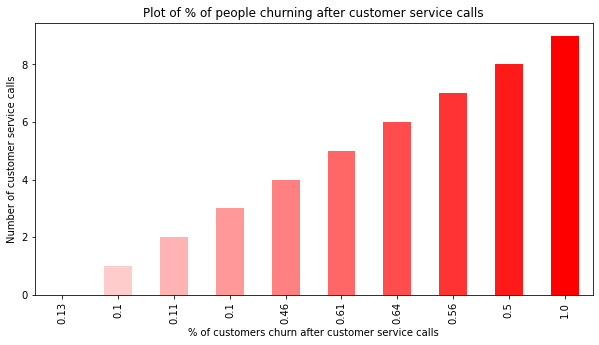

In [ ]:
#Lets analyse churn from customer calls point of view.
df_c =pd.merge(df_cc,df_cs,left_on='Customer service calls',right_on='index')
df_c['%'] = round((df_c['Churn'] / df_c['Customer service calls_y']),2)
#Plot a bar graph
df_c.plot(kind='bar',color=['#ffe6e6','#ffcccc','#ffb3b3','#ff9999','#ff8080','#ff6666','#ff4d4d','#ff3333','#ff1a1a','#ff0000'],x='%',y='Customer service calls_x',)
plt.xlabel('% of customers churn after customer service calls')
plt.ylabel('Number of customer service calls')
plt.title('Plot of % of people churning after customer service calls')
plt.legend().remove()

**From this plot it can be observed that customers churn significantly based on customer service calls.**

In [ ]:
# Lets get mean values of calls,minutes and charge for day ,eve,night,intl calls
A =[int(df.agg({'Total day minutes' : 'mean'})),float(df.agg({'Total day calls' :'mean'})),int(df.agg({'Total day charge' : 'mean'}))]
B = [int(df.agg({'Total eve minutes' : 'mean'})),int(df.agg({'Total eve calls' :'mean'})),int(df.agg({'Total eve charge' : 'mean'}))]
C =[int(df.agg({'Total night minutes' : 'mean'})),int(df.agg({'Total night calls' :'mean'})),int(df.agg({'Total night charge' : 'mean'}))]
D =[int(df.agg({'Total intl minutes' : 'mean'})),int(df.agg({'Total intl calls' :'mean'})),int(df.agg({'Total intl charge' : 'mean'}))]
a=[A,B,C,D]
a++

[[179, 100.43564356435644, 30], [200, 100, 17], [200, 100, 9], [10, 4, 2]]

From the above mean values we can infer that the international call rate per minute seems to be high, if it is made optimal then the customers would retain to the international subscription plan

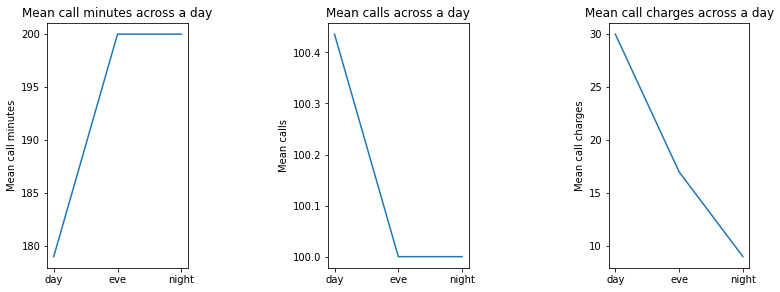

In [ ]:
#Lets plot subplots 
x=['day','eve','night']
y=[179.000000,	200.0,	200.0]
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.ylabel('Mean call minutes')
plt.title('Mean call minutes across a day')
plt.plot(x,y)

x=['day','eve','night']
y= [100.43564356435644,100,100]
plt.subplot(1,3,2)
plt.ylabel('Mean calls')
plt.title('Mean calls across a day')
plt.plot(x,y)

x=['day','eve','night']
y=[30,17,9]
plt.subplot(1,3,3)
plt.ylabel('Mean call charges')
plt.title('Mean call charges across a day')
plt.plot(x,y)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.9,wspace=1,hspace=0.5)

From these plots we can infer that it costs the most to make day calls

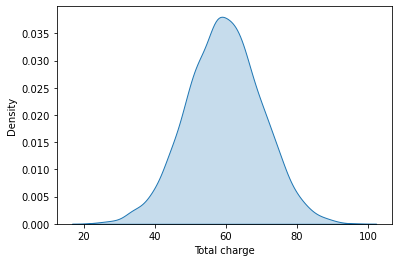

In [ ]:
df['Total charge']=df['Total day charge']+df['Total eve charge'] + df['Total intl charge']+df['Total night charge']
sns.kdeplot(df['Total charge'],shade=True)

In [ ]:
# Finding mean of total charge for people who have churned
df10 =df[df['Churn']==True].groupby(['Total charge']).mean().reset_index()
# Finding mean of total charge for people who have not churned
df11 = df[df['Churn']==False].groupby(['Total charge']).mean().reset_index()
#Finding the percentage variation between the two numbers
(df10['Total charge'].mean()-df11['Total charge'].mean())/df11['Total charge'].mean()

0.12297707724054738

The mean of the total charge is 12.3 % more for customers who churned compared to the customers who did not churn .

In [ ]:
# Sorting account length for analysis
df_len_sorted = df.sort_values(['Account length'],ascending = True)

TList=[]
FList=[]

#Getting Details of people with account length within 50
TList.append(df_len_sorted.loc[(df_len_sorted['Account length'] <= 50 ) & (df_len_sorted['Churn'] == True)].shape[0])
FList.append(df_len_sorted.loc[(df_len_sorted['Account length'] <= 50) & (df_len_sorted['Churn'] == False)].shape[0])

#Getting Details of people with account length in range of 50 to 100
TList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 50) & (df_len_sorted['Account length'] <= 100) & (df_len_sorted['Churn'] == True)].shape[0])
FList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 50) & (df_len_sorted['Account length'] <= 100) & (df_len_sorted['Churn'] == False)].shape[0])

#Getting Details of people with account length in range of 100 to 150
TList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 100) & (df_len_sorted['Account length'] <= 150) & (df_len_sorted['Churn'] == True)].shape[0])
FList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 100) & (df_len_sorted['Account length'] <= 150) & (df_len_sorted['Churn'] == False)].shape[0])

#Getting Details of people with account length in range of 150 to 200
TList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 150) & (df_len_sorted['Account length'] <= 200) & (df_len_sorted['Churn'] == True)].shape[0])
FList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 150) & (df_len_sorted['Account length'] <= 200) & (df_len_sorted['Churn'] == False)].shape[0])

#Getting details of customers with account length above 200
TList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 200 ) & (df_len_sorted['Churn'] == True)].shape[0])
FList.append(df_len_sorted.loc[(df_len_sorted['Account length'] > 200 ) & (df_len_sorted['Churn'] == False)].shape[0])
print(TList)
print(FList)

[44, 190, 195, 48, 6]
[297, 1133, 1118, 282, 20]


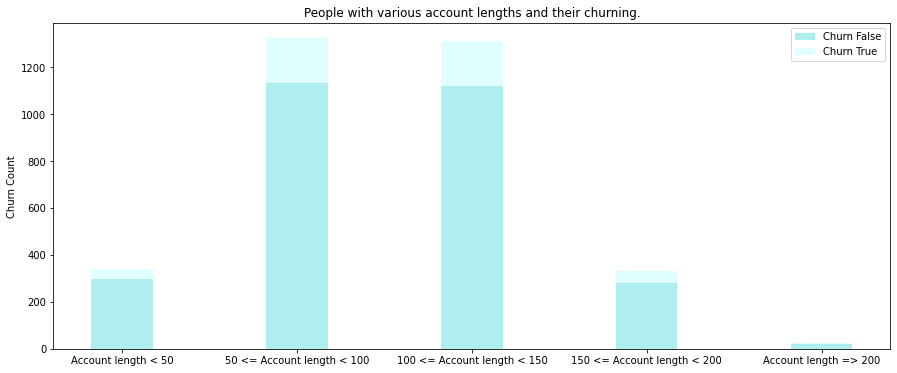

In [ ]:
# Plot a graph of people with various account lengths churning.

index=['Account length < 50','50 <= Account length < 100','100 <= Account length < 150','150 <= Account length < 200','Account length => 200']

width= 0.35
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(index,FList,width,label='Churn False',color='#AFEEEE')
ax.bar(index,TList,width,bottom=FList,label='Churn True',color='#E0FFFF')
ax.set_ylabel('Churn Count')
ax.set_title('People with various account lengths and their churning.')
ax.legend()
plt.show()

From the graph we can infer that customers above account length of 150 are less in number compared to those below account length of 150 and all customers are churning irrespective of their account lengths.

# ***Business Insights:***

---



1) **14.49%** of customers have left the company.

2) **WY,OH,MT & OR** are the states which have **good retention rate**.

3) **Fl,NH & ID** are the states which have **bad retention rate**.

4) We can infer that people from state **'WY'** are enjoying telecom service most among all other states.                      

5) Customers with **no plan churn the most**. International plan subscribers tend to churn more compared to the voice mail plan customers as the cost for international calls are more compared to voice mail.

6) **Customers with international plans are charged at almost the same rate as customers with no international plan**.

7) Customers with **more customer service calls are definitely churning** the company.

8) The mean of the **total charge is 12.3 % more for customers who churned** compared to the customers who did not churn .

9) Customers **above account length of 150 are less in number** compared to those below account length of 150 and all customers are churning irrespective of the account length.

10)Based on the analysis it can be said that the Churn customers are paying significant tariff mostly during the day hours even though the duration of call minutes is the least among three.

# ***Main Reasons for Churning:***



---



#####    1. Higher call rate during the day hours.

#####   2. Increase in customer service calls triggered churning of customers.                         

#####    3. International plan facility is not effective.

# ***Recommendations :***



---



1) The company can reduce Day call rates as there is a massive difference between day call rates and night call rates.

2)The company can also look at giving offers to their subscription plans so that non subscribers of any plan can be nudged towards purchasing a subscription , as 62.53 % of the total churning is done by non subscribers who dont have a subscrption plan.

3) The company can also work towards reducing international call rates so that international call plan holders will not churn the company.

4)The company must subsidize the international call rates for customers with international plan as compared to customers with no international plans

4) The company can look at reducing customer service calls by resolving the customer issues as soon as possible, because the customers are likely to churn the company as the number of calls increase.

5)The telecom company has to provide favourable offers to the 
customers whose account length is above 150 as loyalty bonus so that the customers wont churn.

6) The company might consider rewarding the states with high retention rates and do so very publicly so that customers fromother states are motivated to join the services of the company more .

7)The company might also consider doing surveys in low retention states and giving special offers for in those states so as to boost their morale . 



